In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
import cv2 
from PIL import Image, ImageDraw
from math import sqrt
#from convolution import convolve

ModuleNotFoundError: No module named 'skimage'

In [2]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("helloworld.png")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Select kernel here:
kernel = gaussian_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
    
output_image.save("output.png")

FileNotFoundError: [Errno 2] No such file or directory: 'helloworld.png'

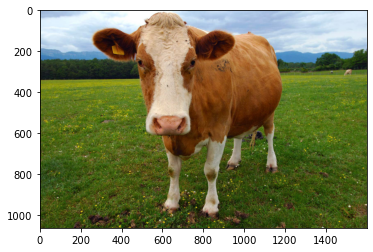

In [20]:
img = Image.open("cow.jpg")
plt.imshow(img)

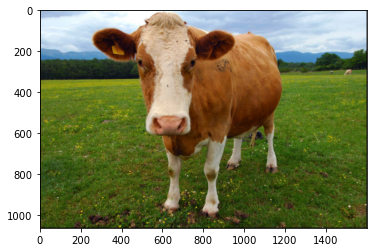

In [18]:
plt.imshow(output_image)

In [23]:
# Load image:
input_image = Image.open("cow.jpg")
input_pixels = input_image.load()

# Calculate pixel intensity as the average of red, green and blue colors.
intensity = [[sum(input_pixels[x, y]) / 3 for y in range(input_image.height)] for x in range(input_image.width)]

# Sobel kernels
kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                magx += intensity[xn][yn] * kernelx[a][b]
                magy += intensity[xn][yn] * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
        
    
output_image.save("outputEdge.png")


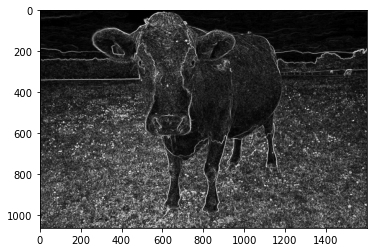

In [24]:
plt.imshow(output_image)